In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 1000
clientFilename = "../Data/ICU/Best/"
# dataFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_Ruleset_MCTS_Baseline_1000pop_1000iters.csv"
graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8
File not found for Client 81
File not found for Client 230
File not found for Client 252
File not found for Client 283
File not found for Client 335
File not found for Client 337
File not found for Client 342
File not found for Client 366
File not found for Client 531
File not found for Client 609
File not found for Client 639
File not found for Client 696
File not found for Client 727
File not found for Client 730
File not found for Client 755
File not found for Client 774
File not found for Client 963
File not found for Client 987
File not found for Client 1018


,Rule,Rule Count,Percent of Population
53,"((MET > 0.000) U[0,0] (death = 0.000))",2669,1.000
57,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",2089,1.000
56,"F[0,0]((BLOOD_UREA_NITROGEN < 0.000 & CREATINI...",1070,1.000
47,"G[0,0]((hr > 0.000 & Pulse > 0.000))",539,0.539
229,"F[0,0](((af < 0.000 | AF < 0.000) & cosen > 0....",313,0.313
...,...,...,...
11493,"G[0,0]((PLATELET_COUNT < 0.000 -> s24_hr > 0.0...",1,0.001
11491,"G[0,0]((CREATININE < 0.000 | SpO2 < 0.000))",1,0.001
11490,"G[0,0]((death > 0.000 | dfa < 0.000))",1,0.001
11489,"G[0,0]((LOS > 0.000 -> TROPONIN_I > 0.000))",1,0.001


## Load LDP Ruleset

In [4]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
9,y = 0.000,1.000
54,y > 0.000,0.996
5,n_evts > 0.000,0.992
6,direct > 0.000,0.980
151,n_edrk > 0.000,0.980
...,...,...
43,Sgy < 0.000,0.096
13,"F[0,0](Sgy < 0.000)",0.036
137,"F[0,0](Sgy > 0.000)",0.034
20,"G[0,0](Sgy > 0.000)",0.010


## Compare Counts Graphically

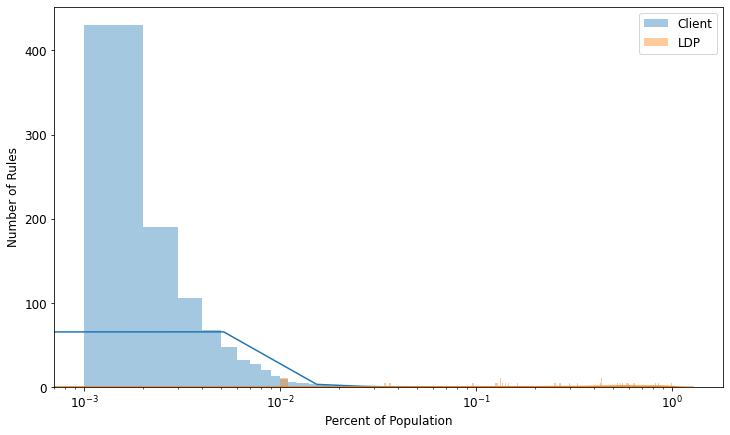

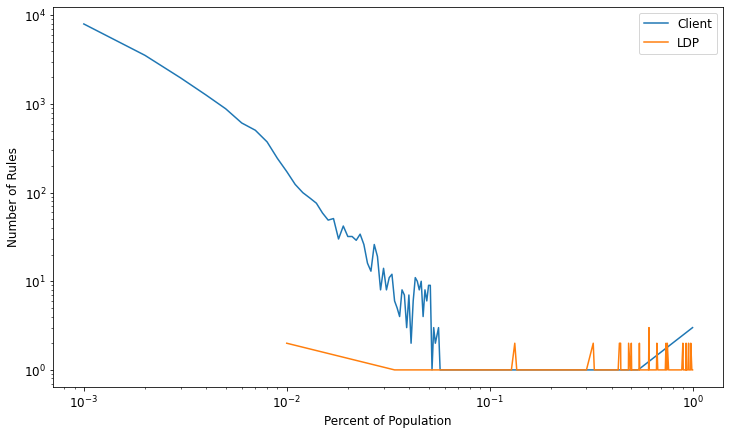

In [5]:
cov.graphRuleCounts(clientDF, ldpDF, graphName)

## Get Table of Structure Counts - Count of rules above threshold

In [7]:
covDF, countDF = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,1210,179,5,0.972826


In [8]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"G[0,0](direct < 0.000)","G[0,0]((direct < 0.000 | n_evts < 0.000))",0.674,0.016
1,"G[0,0](death < 0.000)","G[0,0]((death < 0.000 & Mort < 0.000))",0.667,0.018
2,PROTIME_INR > 0.000,"((PROTIME_INR > 0.000) U[0,0] (y = 0.000))",0.547,0.038
3,AST_GOT < 0.000,"((AST_GOT < 0.000) U[0,0] (y = 0.000))",0.243,0.044
4,n_evts > 0.000,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",0.992,1.000
...,...,...,...,...
174,AF < 0.000,"F[0,0](((af < 0.000 | AF < 0.000) & cosen > 0....",0.701,0.313
175,TOTAL_BILIRUBIN < 0.000,"((TOTAL_BILIRUBIN < 0.000) U[0,0] (y = 0.000))",0.278,0.038
176,AST_GOT > 0.000,"((AST_GOT > 0.000) U[0,0] (y = 0.000))",0.419,0.043
177,MAGNESIUM > 0.000,"((MAGNESIUM > 0.000) U[0,0] (y = 0.000))",0.745,0.056


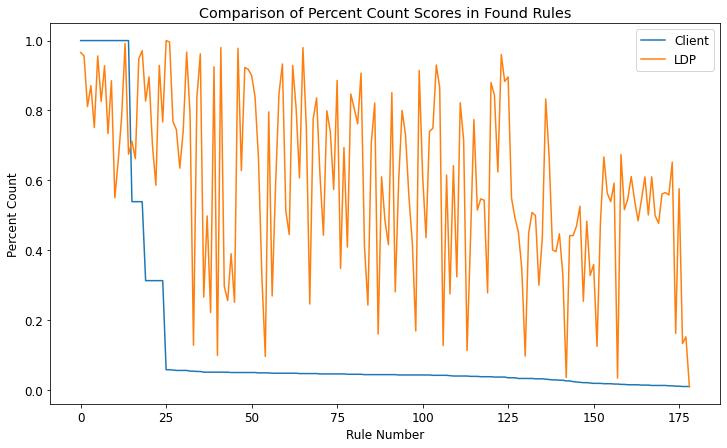

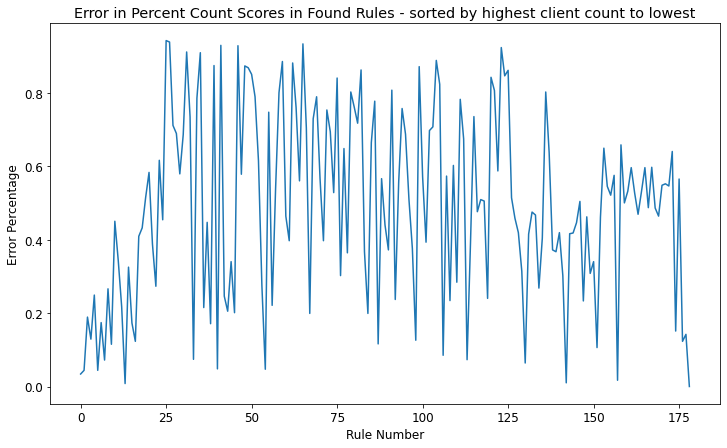

In [18]:
#Look at found rules and compare percent counts
cov.compareFoundRuleCounts(countDF, graphName)